In [1]:
# Import the necessary library

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functions import (histogram_boxplot, labeled_barplot, adj_r2_score, model_performance_regression, 
                       mean_absolute_error,mean_squared_error, mape_score, tunealpha)
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# loading the dataset

In [4]:
df = pd.read_csv('used_cars_data-1.csv')

In [5]:
## Checking the dimension of the data

In [6]:
df.shape

(7253, 14)

# Observation
- There are 7253 rows and 14 columns in the dataset

In [7]:
# Displaying 20 random samples of the dataset

In [8]:
df.sample(20, random_state=0)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4178,4178,Hyundai Verna 1.6 SX,Bangalore,2014,95000,Diesel,Manual,Second,22.32 kmpl,1582 CC,126.32 bhp,5.0,14.255,6.90
528,528,Maruti Swift VXI Optional,Kochi,2017,31696,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,5.0,7.880,5.75
7235,7235,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.570,NaN
4658,4658,Maruti Alto LXi BSII,Pune,2003,69966,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,4.360,0.95
4281,4281,Renault KWID RXT,Pune,2017,4700,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.780,3.00
1425,1425,Renault Duster 110PS Diesel RxL,Bangalore,2014,70000,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.0,15.050,8.25
4899,4899,Mercedes-Benz New C-Class C 220 CDI Elegance AT,Jaipur,2014,41000,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,49.490,18.50
4238,4238,Maruti Alto 800 2016-2019 VXI,Kolkata,2016,31006,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,4.360,2.61
5301,5301,BMW X1 sDrive20d,Delhi,2011,72000,Diesel,Automatic,First,17.05 kmpl,1995 CC,184 bhp,5.0,48.180,11.00
6750,6750,Volkswagen Vento 1.5 TDI Highline Plus AT,Jaipur,2016,57669,Diesel,Automatic,First,21.5 kmpl,1498 CC,108.5 bhp,5.0,16.640,NaN


In [9]:
## checking information about the dataset columns datatype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


## Observation
- Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine and Power are all catetegorical variables
- S/NO, Year, Kilometers_Driven, Seats, New_price and price are all numeric variables

# Checking statistical analysis of the data

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation
- The year of used cars varies from 2013 to 2019 which implies that half of used cars were sold in 2013.
- The least distance covered by any of the used cars is about 171km/hr while the highest distance discovered is 6500km/hr indicating that most of the cars have high rate of kilometers driven.
- The fuel type of most used cars is disel with manual transmission gear and 1197CC engine capacity.
- The seat of the used cars ranges from 5 to 10 indicating that over 25% of the cars have 5 seating capacity.
- The price of the cars start from  £0.44 to £160.00 with more than 50% of the car price above £5.64
- The new price of the cars ranges from £3.91 to £375 with over 50% of the new car price above £7.88
- The marginal increase in price between the price and the new price is about 61%.

# Data Cleaning

In [12]:
## Checking missing data

In [13]:
# Function to check missing number and the percentage
def missing_data(x):
    missing_data = x.isnull().sum()                                            ## determine the missing data 
    missing_percent = round(100 * (missing_data/x.shape[0]),2)                 ## determine missing data percentage
    missing_data_df = pd.DataFrame(data=pd.concat([missing_data,missing_percent],axis=1)) ## Combine missing data to dataframe
    missing_data_df.rename(columns={0:'Missing Data',1:"Percentage_Of_Missing_Data"}, inplace=True) ## Change column name
    return missing_data_df
    
    

In [14]:
missing_report = missing_data(df)

In [15]:
missing_report

,Missing Data,Percentage_Of_Missing_Data
S.No.,0,0.00
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage,2,0.03
Engine,46,0.63


# Observation
- Mileage, Engine, Power, Seats and Price variables contain missing values.
- Less than 1% of Mileage variable is missing. This implies that removing the missing value in this variable will not have any significant effect on our model.
- 0.63% of Engine variable is missing. This implies that removing the missing value is less significant to the model.
- About 2.41% of Power variable is missing. This implies that this variable requires cleaning because it is more than 1%.
- About 0.73% of Seats variable is missing. Removing the missing value will be less significant to our model since it is less than 1% of our entire dataset.
- Over 17% of the price variable is missing which requires cleaning.

In [16]:
## Variables to delete missing values includes Mileage, Engine and Seats

In [17]:
df.dropna(subset=['Mileage','Engine','Seats'],inplace=True)

In [18]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


# Observation
-- There are 7,198 rows ans 14 columns after removing the missing values from Mileage, Engine and Seat variables

In [19]:
# Checking missing value in Power variable

In [20]:
df[df['Power'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,NaN,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,NaN,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,NaN,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59 kmpl,1364 CC,NaN,5.0,8.525,NaN
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59 kmpl,1364 CC,NaN,5.0,8.525,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3 kmpl,1197 CC,NaN,5.0,8.525,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0 kmpl,1086 CC,NaN,5.0,4.550,NaN


In [21]:
## Checking the missing value in Price variable

In [22]:
df[df['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,4.360,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,4.360,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.270,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,NaN,5.0,8.525,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,10.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.150,NaN


- We consider the median value to replace the missing value in the price variable
- We consider the mode value to replace the missing value in Power variable

In [23]:
## Replacing null values with the most common values in Power variable

In [24]:
power_mode = df['Power'].mode()
power_mode

0    74 bhp
Name: Power, dtype: object

In [25]:
df['Power'].fillna('74 bhp', inplace=True)

In [26]:
## Replace null values in Price with the median

In [27]:
df['Price'].fillna(df['Price'].median(), inplace=True)

In [28]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [29]:
## Removing S/NO variable from the dataset
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [30]:
df.drop('S.No.', axis=1, inplace=True)

In [31]:
## The S.No variable has no significant effect on our model

In [32]:
## Checking for duplicate values

In [33]:
df.duplicated().sum()

1

# Observation
- There is 1 duplicate value found in the dataset

In [34]:
## Removing duplicates

In [35]:
df.drop_duplicates()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.65
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,5.65
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,5.65
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,5.65


# Distinguishing variables by their types

In [36]:
category_col = df.select_dtypes(include='object').columns.tolist()

In [37]:
category_col

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [38]:
# Categorical variables include Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine and Power

In [39]:
num_col = df.select_dtypes(exclude='object').columns.tolist()

In [40]:
num_col

['Year', 'Kilometers_Driven', 'Seats', 'New_Price', 'Price']

In [41]:
## Numeric Variable includes Year, Kilometers_Driven, Seat, New_price and Price

# Data Analysis

In [42]:
# Outlier detection by visualization

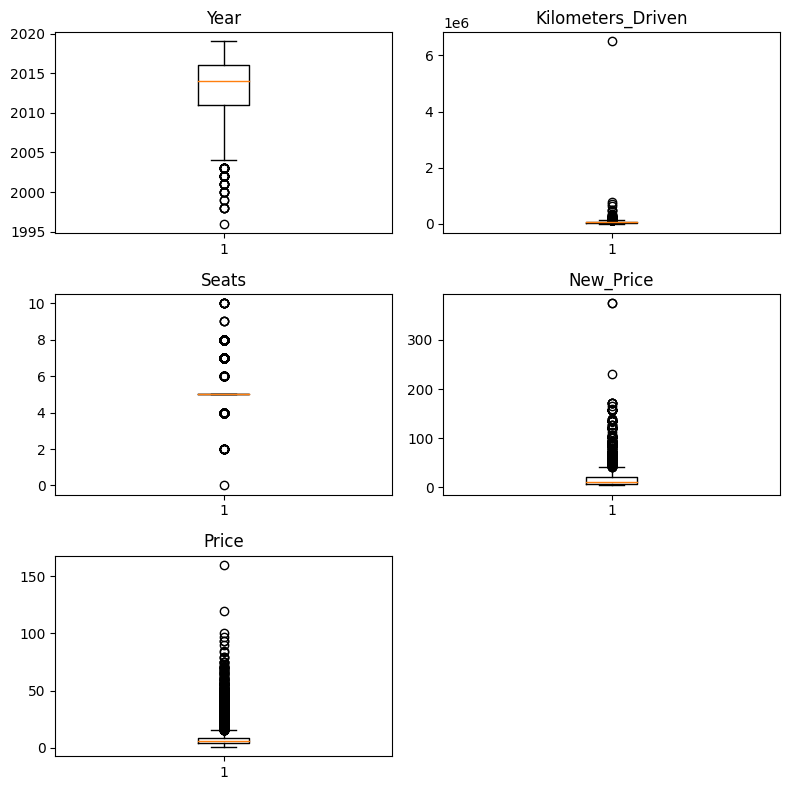

In [43]:
plt.figure(figsize=(8,8))
for x, y in enumerate(num_col):
    plt.subplot(3,2,x+1)
    plt.boxplot(df[y])
    plt.tight_layout()
    plt.title(y)
    

# Observations
- Kilometers_driven, New_price and Price contain outliers
- Based on statistical analysis and the visualization above, Year and Seat are evenly distributely because the mean value is close to the median

# Univariate Analysis

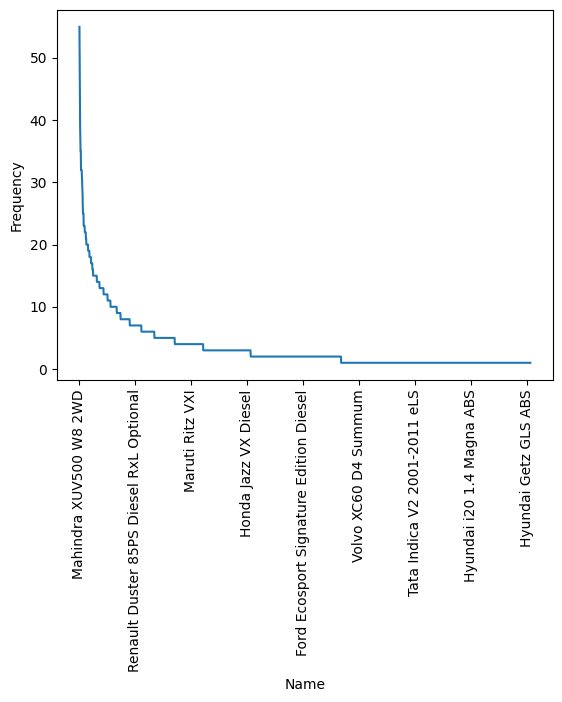

In [44]:
df['Name'].value_counts().plot()
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.show()

## Observation
- The demand for Mahindra XUV500 W8 2WD is relatively high which implies that an increase in sales.

In [45]:
# Visualise Year of the used car

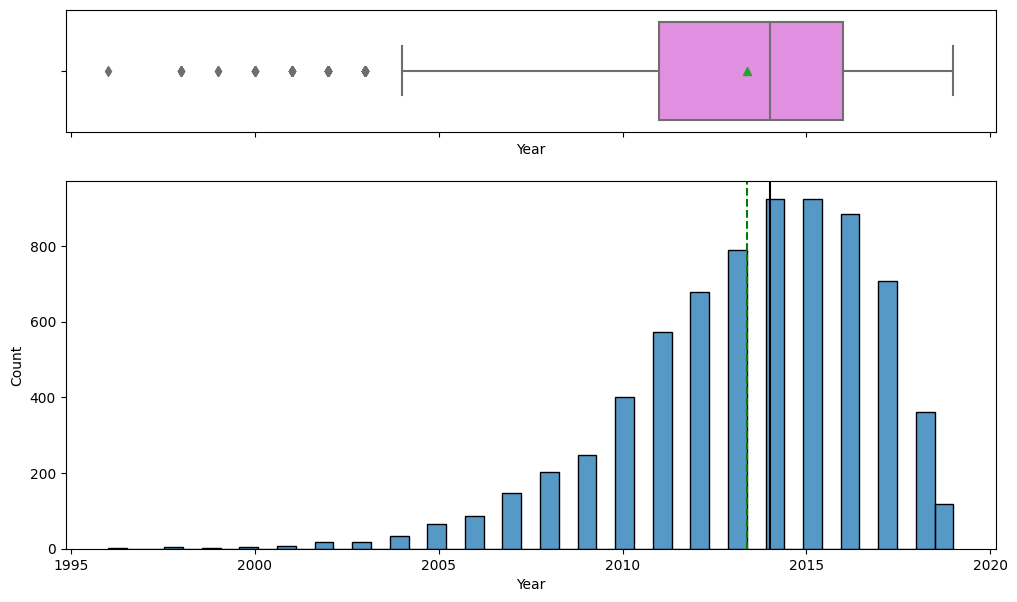

In [46]:
histogram_boxplot(data=df, feature='Year')

# Observation
- The year of production of used cars ranges from 1995 to 2019 
- Most used cars produced between 2013 and 2015 have a huge demand with over 50% sales.

# Visualising Seats of used cars

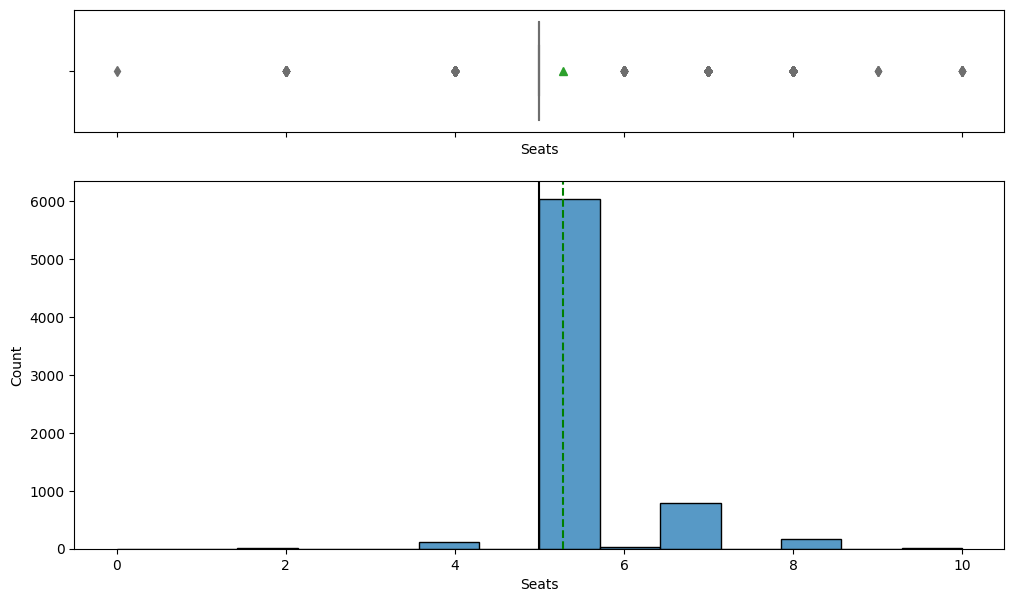

In [47]:
histogram_boxplot(data=df, feature='Seats')

# Observation
- Used car ranges from 1 to 10 seaters
- More than 50% used cars with 5 seats have higher turn-over.

# Visualising Kilometers Driven by cars

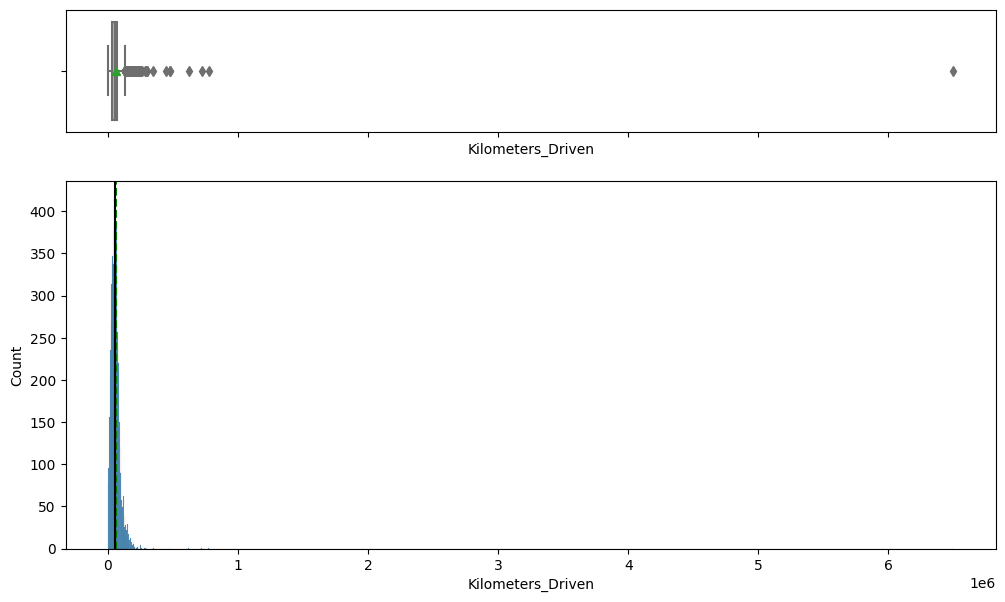

In [48]:
histogram_boxplot(data=df, feature='Kilometers_Driven')

# Observation
- Kilometers_Driven is right skewed.

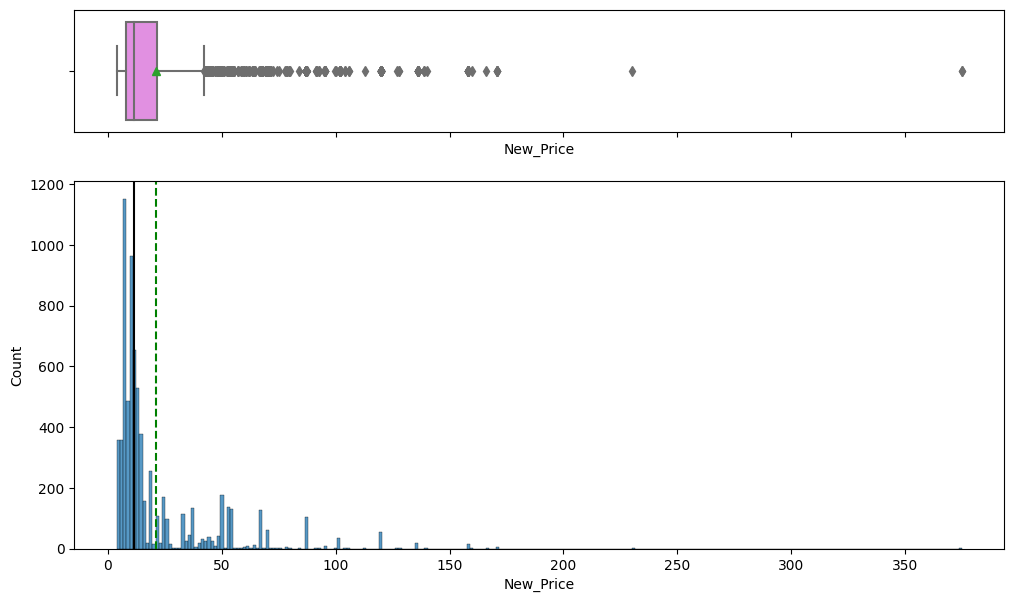

In [49]:
histogram_boxplot(data=df, feature='New_Price')

# Observation
- New_price variable is right skewed
- We will use the log of the price

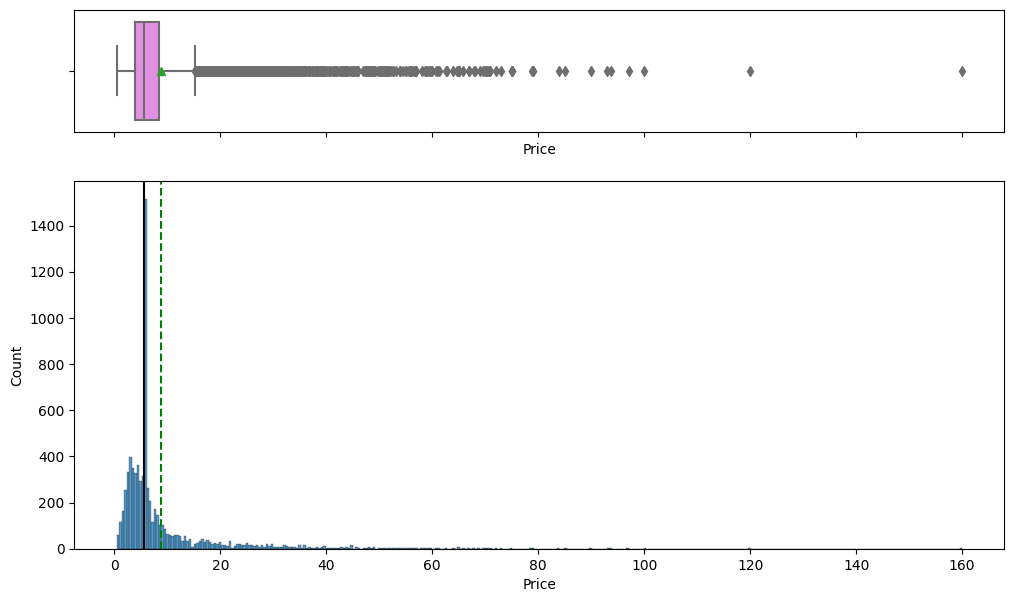

In [50]:
histogram_boxplot(data=df, feature='Price')

# Observation
- The price variable is right skewed

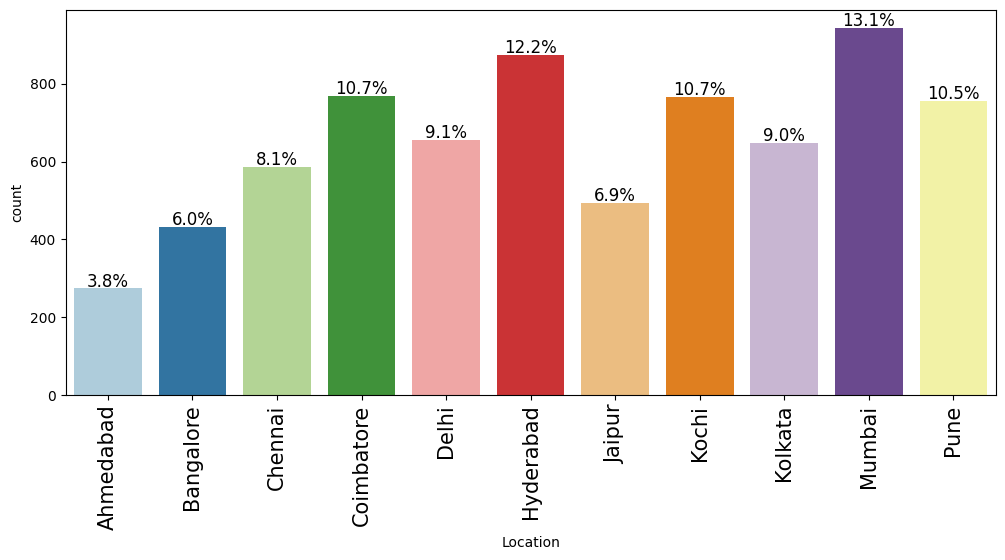

In [51]:
labeled_barplot(data=df, feature='Location', perc=True)

# Observation
 - Mumbai was the highest location with about 13% used car indicating that the city is known for the sales of used cars
 - Hyderabad was the second highest location with 12.2% used car sales

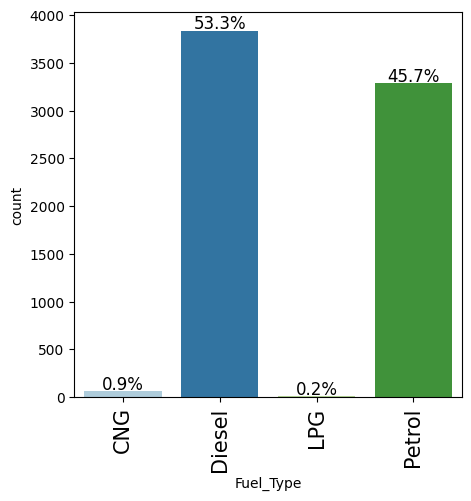

In [52]:
labeled_barplot(data=df, feature='Fuel_Type', perc=True)

# Observation
- Diesel was the highest sold cars indicating that the demand for diesel was huge with about 53.3%.
- The demand for petrol cars is second highest to Diesel engine cars.
- A percentage increase in the price of petrol cars will cause a percentage increase in the demand for diesel cars.

# Visualising Engine Transmission

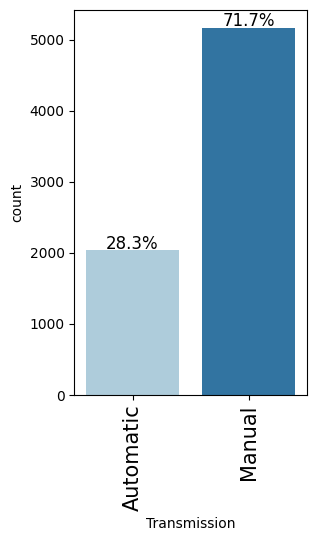

In [53]:
labeled_barplot(data=df, feature='Transmission', perc=True)

In [54]:
df['Transmission'].value_counts(normalize=True)

Manual       0.717283
Automatic    0.282717
Name: Transmission, dtype: float64

# Observation
- Over 70% of sold cars have manual engine transmission which implies that the demand for manual transmision is huge.
- An percentage increase in the price of manual engine will cause more demand for a petrol cars.

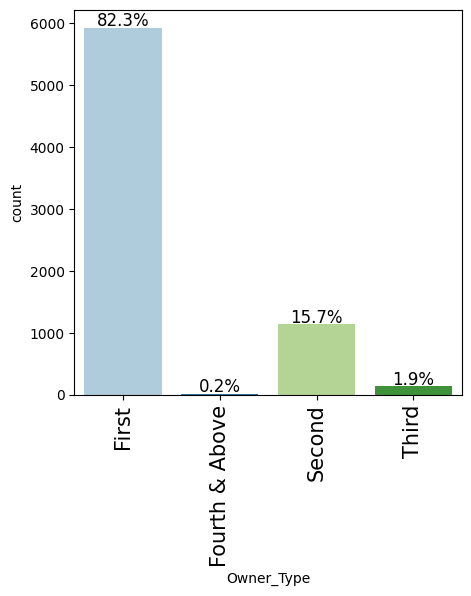

In [55]:
labeled_barplot(data=df, feature='Owner_Type', perc=True)

In [56]:
df['Owner_Type'].value_counts(normalize=True)

First             0.822590
Second            0.157266
Third             0.018616
Fourth & Above    0.001528
Name: Owner_Type, dtype: float64

Observation
- More than 80% of car owner type is First which indicates that the rate of first car owner is huge.

# Dealing with skewed variable

In [57]:
df['Kilometers_Driven'] = np.log(df['Kilometers_Driven'])
df['New_Price'] = np.log(df['New_Price'])
df['Price'] = np.log(df['Price'])

# Correlational

C:\Users\User\AppData\Local\Temp\ipykernel_23844\815389192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='g', annot=True)


<AxesSubplot: >

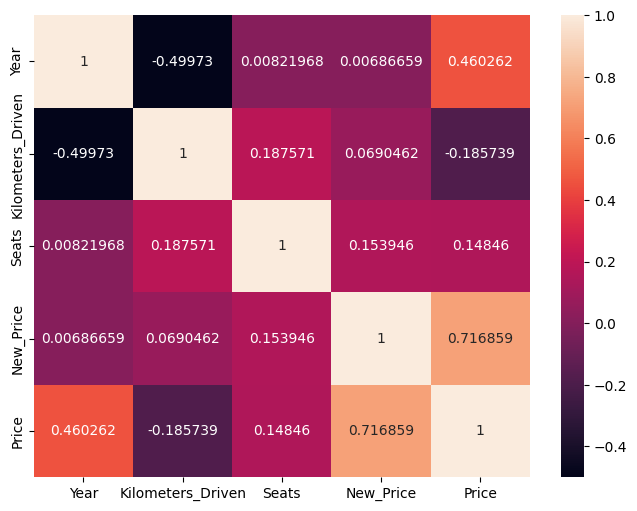

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), fmt='g', annot=True)

# Observation
- An increase in price for each year will cause a 46% increase in the sales of used cars.
- A 72% increase in price will result to an increase in new price of cars indicating that the demand for new cars will drop.
- A slight increase in the number of seats will cause about 15% increase in new price.
- A slight increase in Kilometers driven will result to about 6% increase in new price.
- A 1% increase in Kilometers driven will result to about 18% increase in the number of Seats.
- An increase in car Seats will cause 14% increase in the price of used cars 

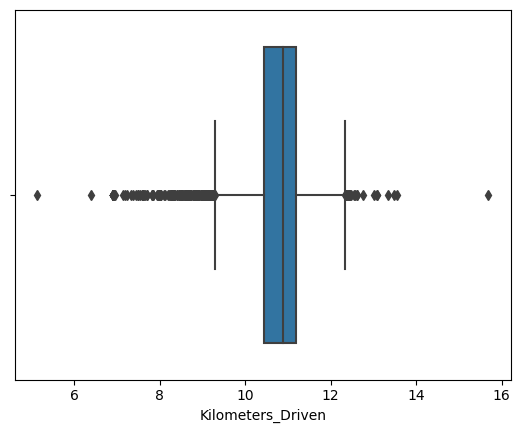

In [59]:
sns.boxplot(data=df, x=df['Kilometers_Driven'])
plt.show()

# Bivariate Analysis

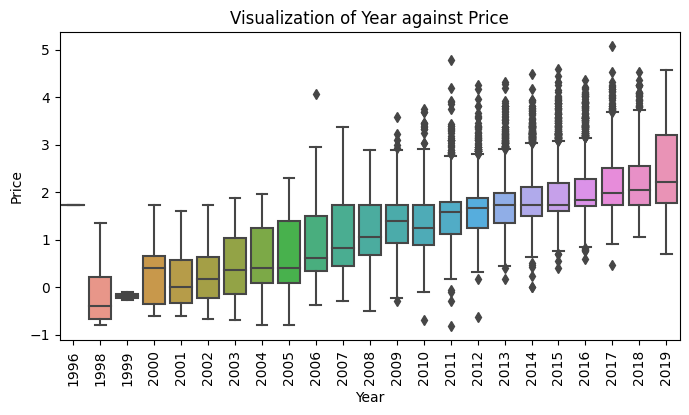

In [60]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Year',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Visualization of Year against Price')
plt.show()

# Observation
- The price of used cars increases by more than 30% between 2013 and 2019.

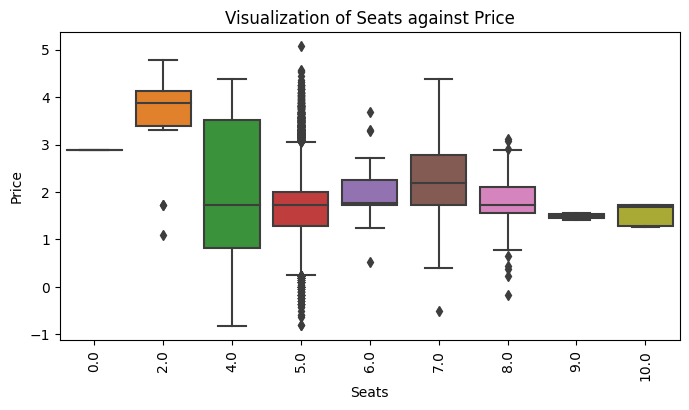

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Seats',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Seats')
plt.ylabel('Price')
plt.title('Visualization of Seats against Price')
plt.show()

# Observation
- An increase in the number of seat results to a decrease in price.

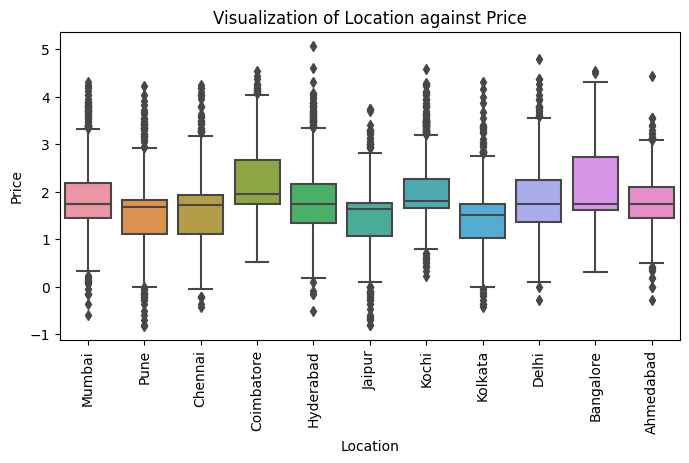

In [62]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Location',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Visualization of Location against Price')
plt.show()

# Observation
- The price of car in Mumbai, Bangalore,Coimbatore and Hyderabad is relatively higher than other locations.

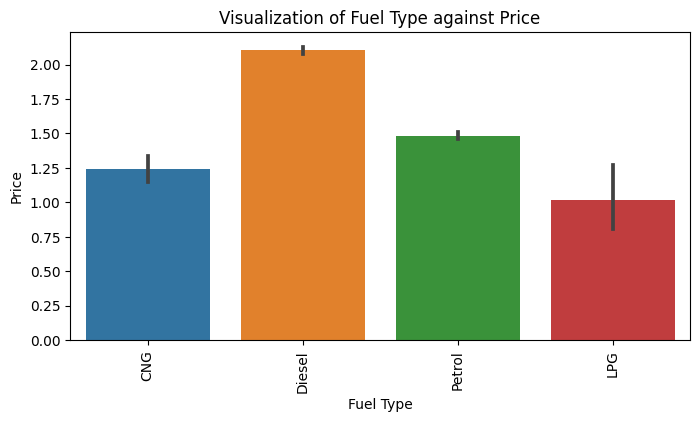

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Fuel_Type',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Visualization of Fuel Type against Price')
plt.show()

# Observation
- The price of diesel cars is relatively higher than petrol.

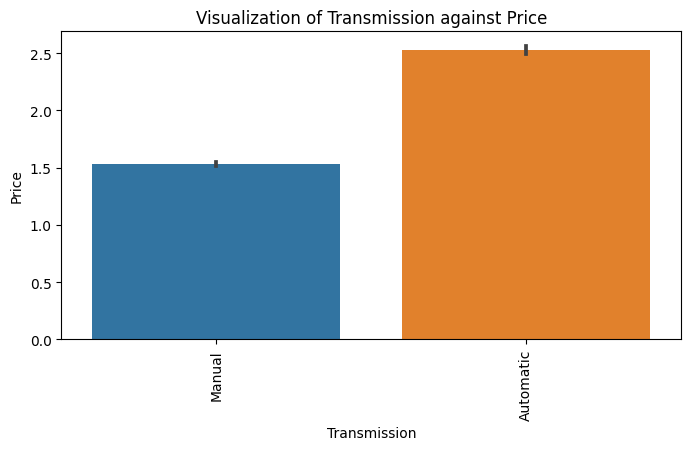

In [64]:
plt.figure(figsize=(8,4))
trans = sns.barplot(data=df, x='Transmission',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Visualization of Transmission against Price')
plt.show()

Observation
- The price of automatic engine car is relatively higher than manuel engine transmission.

In [65]:
## Separate the feature from the target

In [66]:
X = df.drop(['Price'], axis=1)
y= df['Price']

In [67]:
## Convert features categorical variable to dummy

In [68]:
#x_dummy = pd.get_dummies(X,columns=["Name","Location","Fuel_Type","Transmission", "Owner_Type","Mileage","Engine","Power","Seats"])

In [69]:
x_dummy = pd.get_dummies(X,columns=category_col)

In [70]:
x_dummy

,Year,Kilometers_Driven,Seats,New_Price,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,Name_Audi A4 1.8 TFSI,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.63 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp
0,2010,11.184421,5.0,1.706565,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,10.621327,5.0,2.776332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,10.736397,5.0,2.152924,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,11.373663,7.0,2.422144,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,10.613246,5.0,3.972930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,11.400999,5.0,2.582487,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7249,2015,10.985293,5.0,2.317474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7250,2012,10.239960,5.0,2.248129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,2013,10.864025,5.0,2.317474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
x_train,x_test, y_train, y_test = train_test_split(x_dummy,y,test_size=0.25, random_state=0)

In [72]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [73]:
lr = LinearRegression()
lr.fit(x_train_sc,y_train)

LinearRegression()

In [74]:
train_reg = model_performance_regression(lr,x_train_sc,y_train)

In [75]:
train_reg

,RMSE,MAE,R-Squared,Adj R2 Squared,MAPE
0,0.384219,0.274766,0.768993,0.474834,inf


In [76]:
## Checking the different metrics of the model on testing

In [77]:
test_reg = model_performance_regression(lr,x_test_sc,y_test)
test_reg

,RMSE,MAE,R-Squared,Adj R2 Squared,MAPE
0,3.836394e+13,9.447925e+12,-2.395086e+27,3.520229e+27,inf


# Observation
- The R_squared error for the training is higher than the testing data which implies that the model is overfiting
- The RMSE for the training and testing shows that the model is overfiting.
- The Mean Absolute Error performs well on the training but very poor on testing which implies that the model is overfiting.

In [83]:
# We consider doing feature selection to regularize the model.

In [86]:
#pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 3023 out of 3023 | elapsed:   17.1s finished

[2022-11-13 22:02:28] Features: 1/3023 -- score: 0.5212861081640155[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 2720 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 3022 out of 3022 | elapsed:   19.4s finished

[2022-11-13 22:02:48] Features: 2/3023 -- score: 0.7258646939519727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed

[Parallel(n_jobs=-1)]: Done 3002 out of 3009 | elapsed:  1.2min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3009 out of 3009 | elapsed:  1.2min finished

[2022-11-13 22:14:14] Features: 15/3023 -- score: 0.7560961657592371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3008 out of 3008 | elapsed:  1.2min finished

[2022-11-13 22:15:24] Features: 16/3023 -- score: 0.7569634096062903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      |

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2996 out of 2996 | elapsed:  2.1min finished

[2022-11-13 22:35:53] Features: 28/3023 -- score: 0.7665345608884007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 1005 t

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2985 out of 2985 | elapsed:  2.5min finished

[2022-11-13 23:00:29] Features: 39/3023 -- score: 0.7751759948497715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2984 out of 2984 | elapsed:  2.5min finished

[2022-11-13 23:03:0

In [82]:
# Regularsing the model

In [78]:
ridge = Ridge()
ridge.fit(x_train_sc,y_train)

Ridge()

In [81]:
tunealpha(Ridge,x_train_sc,y_train,0.1,10)

Alpha is 0.1
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271918  0.157882   0.884297        0.736964   inf
Alpha is 1.2000000000000002
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271941  0.157948   0.884278         0.73692   inf
Alpha is 2.3000000000000003
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271954  0.157988   0.884267        0.736895   inf
Alpha is 3.4000000000000004
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271961  0.158017   0.884261         0.73688   inf
Alpha is 4.5
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271966  0.158042   0.884256        0.736871   inf
Alpha is 5.6
      RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.27197  0.158064   0.884253        0.736864   inf
Alpha is 6.7
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271973  0.158087   0.884251        0.736858   inf
Alpha is 7.800000000000001
       RMSE       MAE  R-Squared  Adj R2 Squared  MAPE
0  0.271975  0

# Please i couldnt finish up the project because my system was hanging. Please I will send to you again. Thank you Sir your understanding